In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import pandas as pd
from matplotlib.pyplot import figure

In [2]:
filePI = "/glade/work/smagahey/GEOG8130/data/project_results/my_cesm.B1850.f19_g17.project_preindustrial.new.cam.T.Q.CLOUD.lev_p.0001-0010.nc"
fileCH4 = "/glade/work/smagahey/GEOG8130/data/project_results/my_cesm.B1850.f19_g17.ch4_perturbation.cam.new.h0.T.Q.CLOUD.lev_p.0001-0010.nc"

In [3]:
dsPI = xr.open_dataset(filePI)
dsCH4 = xr.open_dataset(fileCH4)
T_PI = dsPI['T']
Q_PI = dsPI['Q']
CLOUD_PI = dsPI['CLOUD']

T_CH4 = dsCH4['T']
Q_CH4 = dsCH4['Q']
CLOUD_CH4 = dsCH4['CLOUD']



In [4]:

changeQ = Q_CH4.mean(dim='time',skipna=True) - Q_PI.mean(dim='time',skipna=True)
changeT = T_CH4.mean(dim='time',skipna=True) - T_PI.mean(dim='time',skipna=True)
changeCLOUD = CLOUD_CH4.mean(dim='time',skipna=True) - CLOUD_PI.mean(dim='time',skipna=True)

lat = np.linspace(-90,90,96)
lon = np.linspace(0,360,144)

levp = dsPI['lev_p']



In [9]:
qzon = changeQ.mean(dim='lon',skipna=True)*1000
tzon = changeT.mean(dim='lon',skipna=True)
cldzon = changeCLOUD.mean(dim='lon',skipna=True)

In [15]:
cldzon.min()

<xarray.DataArray 'CLOUD' ()>
array(-0.10673739)

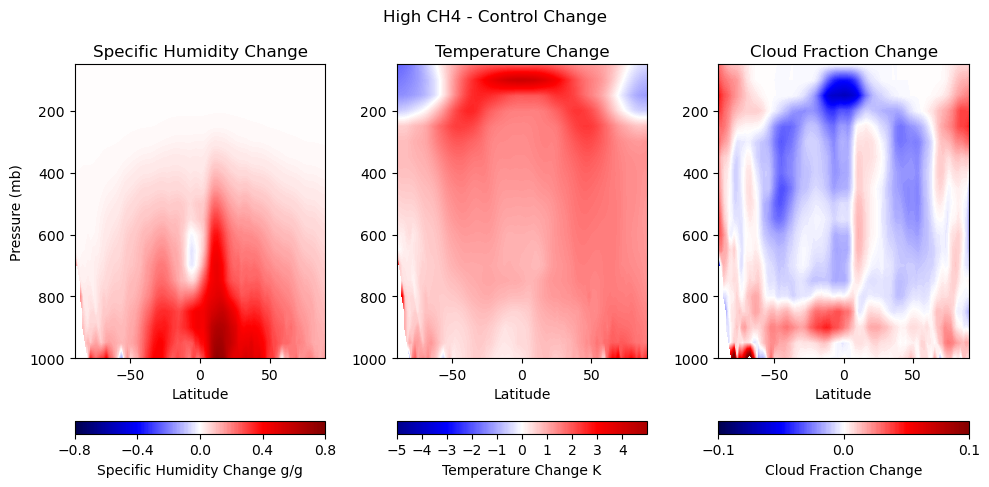

In [44]:
# zonal mean figure PD

fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,3,1)
bounds1 = np.arange(-.8,.801,.005)
a = plt.contourf(lat,levp,qzon,bounds1,cmap="seismic",vmin=-.8,vmax=.801)
cbar1 = plt.colorbar(a,label='Specific Humidity Change g/g', orientation="horizontal",extend = 'both',ax=ax1,drawedges=False,boundaries = bounds1,ticks=[-.8,-.4,0,.4,.8])
#cbar1.set_ticks([-.8,-.4,0,.4,.8])
plt.title('Specific Humidity Change')
plt.xlabel('Latitude')
plt.ylabel('Pressure (mb)')
ax1.set_xlim(-90, 90)
ax1.set_ylim(50, 1000)
ax1.invert_yaxis()
plt.tight_layout()

ax2=fig.add_subplot(1,3,2)
bounds2 = np.arange(-5,5,.01)
b = plt.contourf(lat,levp,tzon,bounds2,cmap="seismic",vmin=-6,vmax=6)
cbar2 = plt.colorbar(b,label='Temperature Change K', orientation="horizontal",extend = 'both',ax=ax2,drawedges=False,boundaries = bounds2)
#cbar2.set_ticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
plt.title('Temperature Change')
plt.xlabel('Latitude')
#plt.ylabel('Pressure (mb)')
ax2.set_xlim(-90, 90)
ax2.set_ylim(50, 1000)
ax2.invert_yaxis()
plt.tight_layout()  

ax3=fig.add_subplot(1,3,3)
bounds3 = np.arange(-.1,.101,.001)
c = plt.contourf(lat,levp,cldzon,bounds3,cmap="seismic",vmin=-.1,vmax=.101)
cbar3 = plt.colorbar(c,label='Cloud Fraction Change', orientation="horizontal",extend = 'both',ax=ax3,drawedges=False,boundaries=bounds3,ticks=[-.1, 0,.1])
#cbar3.set_ticks([-.1,0,.1])
plt.title('Cloud Fraction Change')
plt.xlabel('Latitude')
#plt.ylabel('Pressure (mb)')
ax3.set_xlim(-90, 90)
ax3.set_ylim(50, 1000)
ax3.invert_yaxis()
plt.suptitle("High CH4 - Control Change")
plt.tight_layout()  
plt.savefig("zonal_plots_project.png")
                    
                    
